In [1]:
!pip install matplotlib

You are using pip version 18.1, however version 19.2.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
from matplotlib import pyplot as plt

In [3]:
from pygame.math import Vector2
import numpy as np

pygame 2.0.0.dev3 (SDL 2.0.9, python 3.7.2)
Hello from the pygame community. https://www.pygame.org/contribute.html


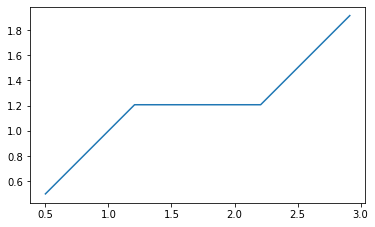

In [64]:
r2 = 0.5 ** 0.5
def mkverts(theta):
    v = Vector2(r2, r2)
    r = Vector2(1, 0)
    delta = [v, r.rotate_rad(theta), v]
    pos = Vector2()
    verts = [pos]
    for d in delta:
        verts.append(verts[-1] + d)
    return np.array(verts) + (0.5, 0.5)

verts = mkverts(0)
plt.axes().set_aspect(1)
plt.plot(verts[:, 0], verts[:, 1]);

In [5]:
import numpy.linalg


dot = numpy.dot
def norm(v):
    m = mag(v)
    if m:
        return v / m
    else:
        return 0 * v
    
#norm = numpy.linalg.norm

def mag(v):
    return np.sum(v ** 2) ** 0.5

norm(np.array([3, 4]))

array([0.6, 0.8])

/home/mauve/dev/wasabi2d/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


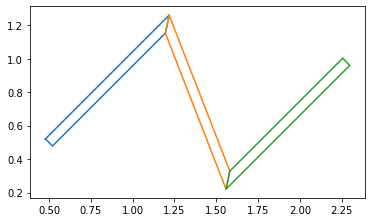

In [183]:
def plot_strip(verts):
    for i in range(2, len(verts), 2):
        vs = verts[[i - 1, i - 2, i, i + 1, i - 1]]
        plt.axes().set_aspect(1)
        yield vs[:, 0], vs[:, 1]

        
WIDTH = 0.03
MITRE_LIMIT = 4

ROT90 = np.array([
    [0, -1],
    [1, 0],
])
        
def geom_shader(gs_in):
    assert len(gs_in) == 4
    a, b, c, d = gs_in
    
    ab = norm(b - a)
    bc = norm(c - b)

    if not mag(bc):
        bc = ab
    
    # across bc
    xbc = norm(bc) @ ROT90
    
    along = norm(norm(ab) + norm(bc))
    across_mitre = along @ ROT90
    
    scale = 1 / dot(xbc, across_mitre)
    
    # This kind of works Ok although it does cause the width to change
#     scale = min(scale, MITRE_LIMIT)  # limit extension of the mitre
#     across = WIDTH * across_mitre * scale
    
#     yield b + across
#     yield b - across
    
    # This causes a hard flip to an alternate corner but the width change is negligible
    if scale > MITRE_LIMIT:
        across = WIDTH * -xbc
        yield b + across
        yield b - across
        yield b - across
        yield b + across
    else:
        across = WIDTH * across_mitre * scale
        yield b + across
        yield b - across

    
def stripify(verts):
    vs = []
    n_verts = len(verts)
    idxs = [0, *range(n_verts)]
    idxs.extend([idxs[-1]] * 3)
    for v in range(1, n_verts + 1):
        v_is = idxs[v - 1:v + 3]
        gs_in = verts[v_is]
        vs.extend(geom_shader(gs_in))
    return np.array(vs)


for xs, ys in plot_strip(stripify(mkverts(-1.2))):
    plt.plot(xs, ys)

/home/mauve/dev/wasabi2d/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


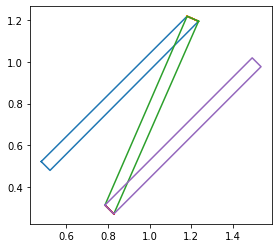

In [184]:
for xs, ys in plot_strip(stripify(mkverts(4.3))):
    plt.plot(xs, ys)

/home/mauve/dev/wasabi2d/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


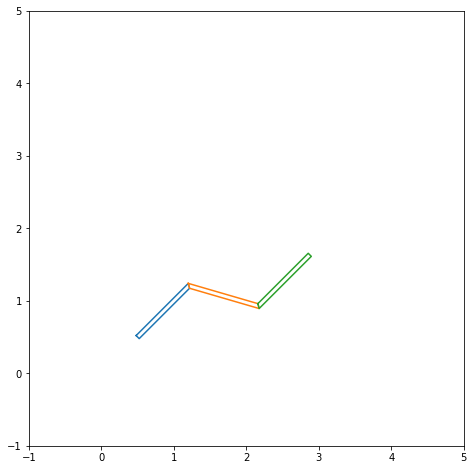

In [185]:
import matplotlib
from itertools import zip_longest
matplotlib.rcParams['animation.html'] = 'html5'

fig = plt.figure(figsize=(8, 8))
ax = plt.axes()
 

lns = []
for _ in range(6): #plot_strip(stripify(mkverts(0))):
    ln, = plt.plot([], [], '-')
    lns.append(ln)


def update(f):
    for ln, d in zip_longest(lns, plot_strip(stripify(mkverts(f)))):
        if d:
            ln.set_data(*d)
        else:
            ln.set_data([], [])
    return lns


def init():
    ax.set_xlim(-1, 5)
    ax.set_ylim(-1, 5)
    ax.set_aspect('equal')
    return lns


FuncAnimation(fig, update, frames=np.linspace(0, 6, 30), interval=50,
    init_func=init,
    blit=True)